# OPTIMIZATION METHODS IN STRUCTURAL ENGINEERS

Optimizations in structural engineering offer several advantages that can significantly enhance the design, construction, and performance of structures. Overall, optimization techniques empower structural engineers to achieve cost-effective, sustainable, and high-performing structures that meet safety requirements while maximizing resource efficiency. 


In recent years, some optimization methods that are conceptually different from the traditional mathematical programming techniques have been developed such as Genetic algorithms, Simulated annealing, Particle swarm optimization, Ant colony optimization, Fuzzy optimization, Neural-network-based methods,... These methods are labeled as modern or nontraditional methods of optimization.

In this topic we will discuss two following methods:

1. Optimization (scipy.optimize)
2. Genetic algorithms

The scipy.optimize module in Python provides a collection of optimization algorithms for solving various optimization problems. It offers a wide range of optimization methods, including both local and global optimization techniques. It is widely used in various domains, including engineering, machine learning, finance, and scientific research.

Genetic algorithms are optimization techniques inspired by the process of natural selection and genetics. They are used to find optimal solutions to complex problems by simulating the principles of evolution and genetic recombination (initialization, evaluation, selection, reproduction, replacement, termination).




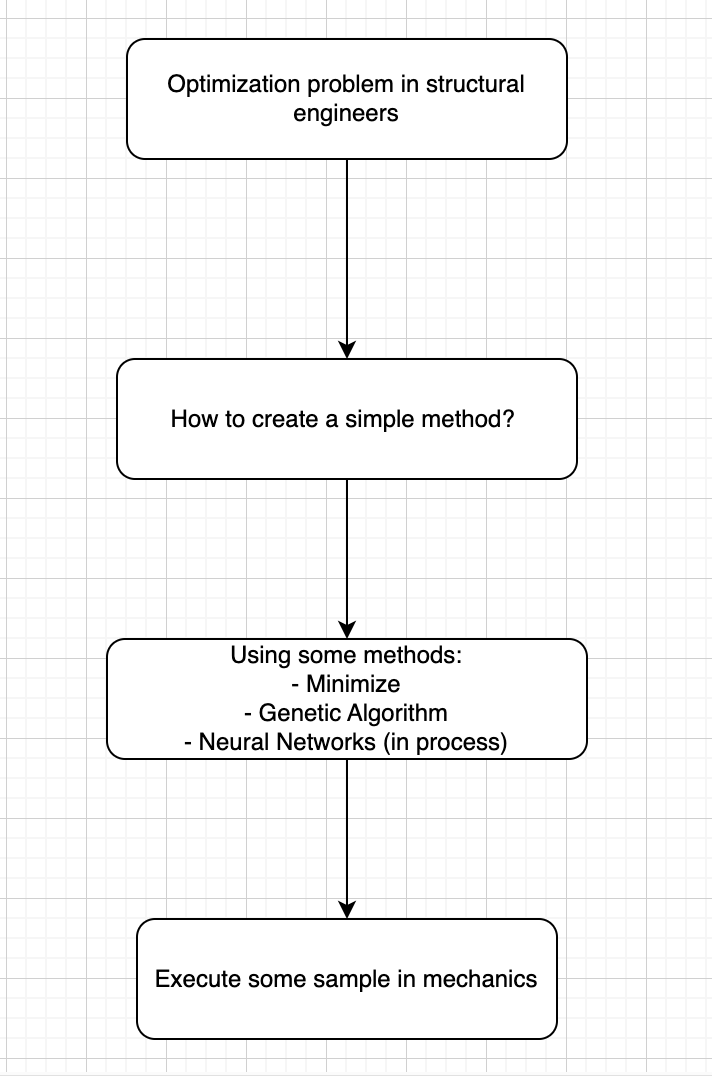


## Problems in structural engineers

The general problem in structural engineers is to find a set of variables $\bf{X}$ $=\{x_1, x_2,...,x_n\}^T$ which minimines the objective function $f(\bf{X})$ that satisfy constraints:

$$g_1(\bf{X}) \leq \alpha$$

$$g_2(\bf{X}) \geq \beta$$

$$g_3(\bf{X}) = \gamma$$



# Create a simple optimization method
First, let's start with an approximation problem. We assume that we need to find the optimal values for variables  (x,y,z) that makes the function $F(x,y,z)$ approximate a given real number α.

This problem can be formulated as finding the root of the equation  $f(x,y,z)=F(x,y,z)-\alpha=0$. 

To illustrate the concept, let's consider the following example and develop our own optimization method:

$f(x,y,z)=6x^3+9y^2+90z-25=0$

In [1]:
## This is a sample Python script.
import random

# define an objective function
# In this method, we find solution (x,y,z) that makes function f(x,y,z)=0

def OF(x,y,z):
    return 6*x**3+9*y**2+90*z-25

# fitness function (maximum of the fitness function makes the error minimizes)
def fitness(x,y,z):
    ans=OF(x,y,z)

    if ans==0:
        return 99999
    else:
        return abs(1/ans)

# Generate solutions: get 1000 random solutions then check which one return the minimum error (in Genetic Algorithm method this step is chosing the population)
solutions=[]
for s in range(1000):
    solutions.append((random.uniform(0,10000),
                      random.uniform(0,10000),
                      random.uniform(0,10000)))

# save the best solutions in one list    
for i in range(10000):
    ranksolutions=[]
    for s in solutions:
        ranksolutions.append((fitness(s[0],s[1],s[2]),s))
    ranksolutions.sort()
    ranksolutions.reverse()

    #print(f"=== Gen {i} best solutions ===")
    #print(ranksolutions[0])
    if ranksolutions[0][0]>9999:
        break
    # chose 100 best solutions and genberate again 
    bestsolutions=ranksolutions[:100]

    elements=[]
    for s in bestsolutions:
        elements.append(s[1][0])
        elements.append(s[1][1])
        elements.append(s[1][2])

    newGen=[]
    for _ in range(1000):
        e1=random.choice(elements)*random.uniform(0.99,1.01)
        e2 = random.choice(elements)*random.uniform(0.99,1.01)
        e3 = random.choice(elements)*random.uniform(0.99,1.01)

        newGen.append((e1,e2,e3))
    solutions=newGen



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print(f" The fitness value is {ranksolutions[0][0]}")
    s=ranksolutions[0][1]
    print(f"The best solution is {s}")
    ans=OF(s[0],s[1],s[2])
    print(f"The error of the method {abs(ans)}")


 The fitness value is 10092.402329494109
The best solution is (0.27742055489093115, 0.2754473360682655, 0.268768362799983)
The error of the method 9.908443672301814e-05


In [2]:
import random

# Define an objective function
def OF(x, y):
    return x * y - 2

# Define the fitness function
def fitness(x, y):
    ans = OF(x, y)
    deviation_from_1 = abs(y - 1)
    
    if ans == 0:
        return 99999 - deviation_from_1
    else:
        return abs(1 / ans) - deviation_from_1

# Generate solutions: get 1000 random solutions (in the domains of x and y), then check which one returns the minimum error 
solutions = []
for s in range(1000):
    solutions.append((random.uniform(0.5, 3), random.uniform(0.9, 1.1)))

# Save the best solutions in one list    
for i in range(10000):
    ranksolutions = []
    for s in solutions:
        ranksolutions.append((fitness(s[0], s[1]), s))
    ranksolutions.sort(reverse=True)

    if ranksolutions[0][0] > 9999:
        break

    # Choose 100 best solutions and generate again
    bestsolutions = ranksolutions[:100]

    elements = []
    for s in bestsolutions:
        elements.append(s[1][0])
        elements.append(s[1][1])

    newGen = []
    for _ in range(1000):
        e1 = random.choice(elements) * random.uniform(0.99, 1.01)
        e2 = random.choice(elements) * random.uniform(0.9, 1.1)
        newGen.append((e1, e2))

    solutions = newGen

# Print the best solution found
best_solution = ranksolutions[0][1]
fitness_value = ranksolutions[0][0]
error = abs(OF(best_solution[0], best_solution[1]))

print(f"The fitness value is {fitness_value}")
print(f"The best solution is {best_solution}")
print(f"The error of the method is {error}")

The fitness value is 149270.03762961717
The best solution is (1.9666941459203695, 1.0169315370574392)
The error of the method is 6.6992673308785555e-06


# Using scipy.minimize
https://docs.scipy.org/doc/scipy/tutorial/optimize.html

In [3]:
(x,y)=(1.858545399843562, 1.076151636518013)
x*y

2.0000766735846742

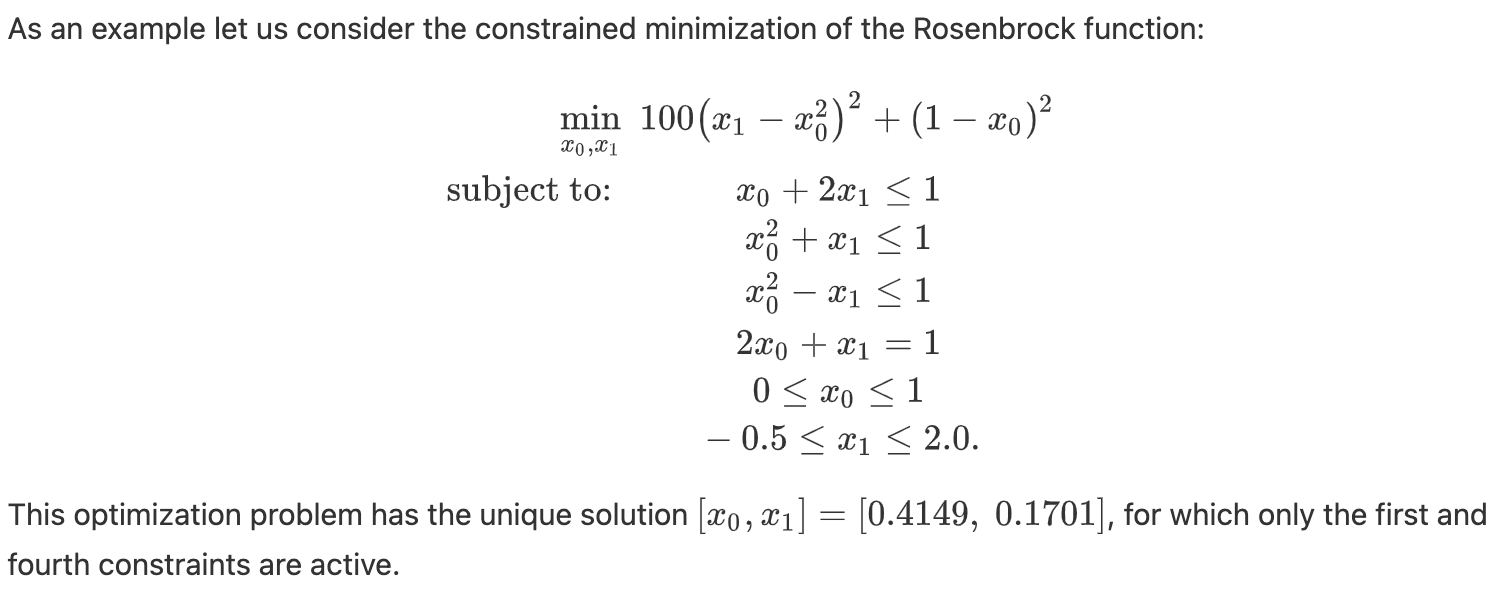
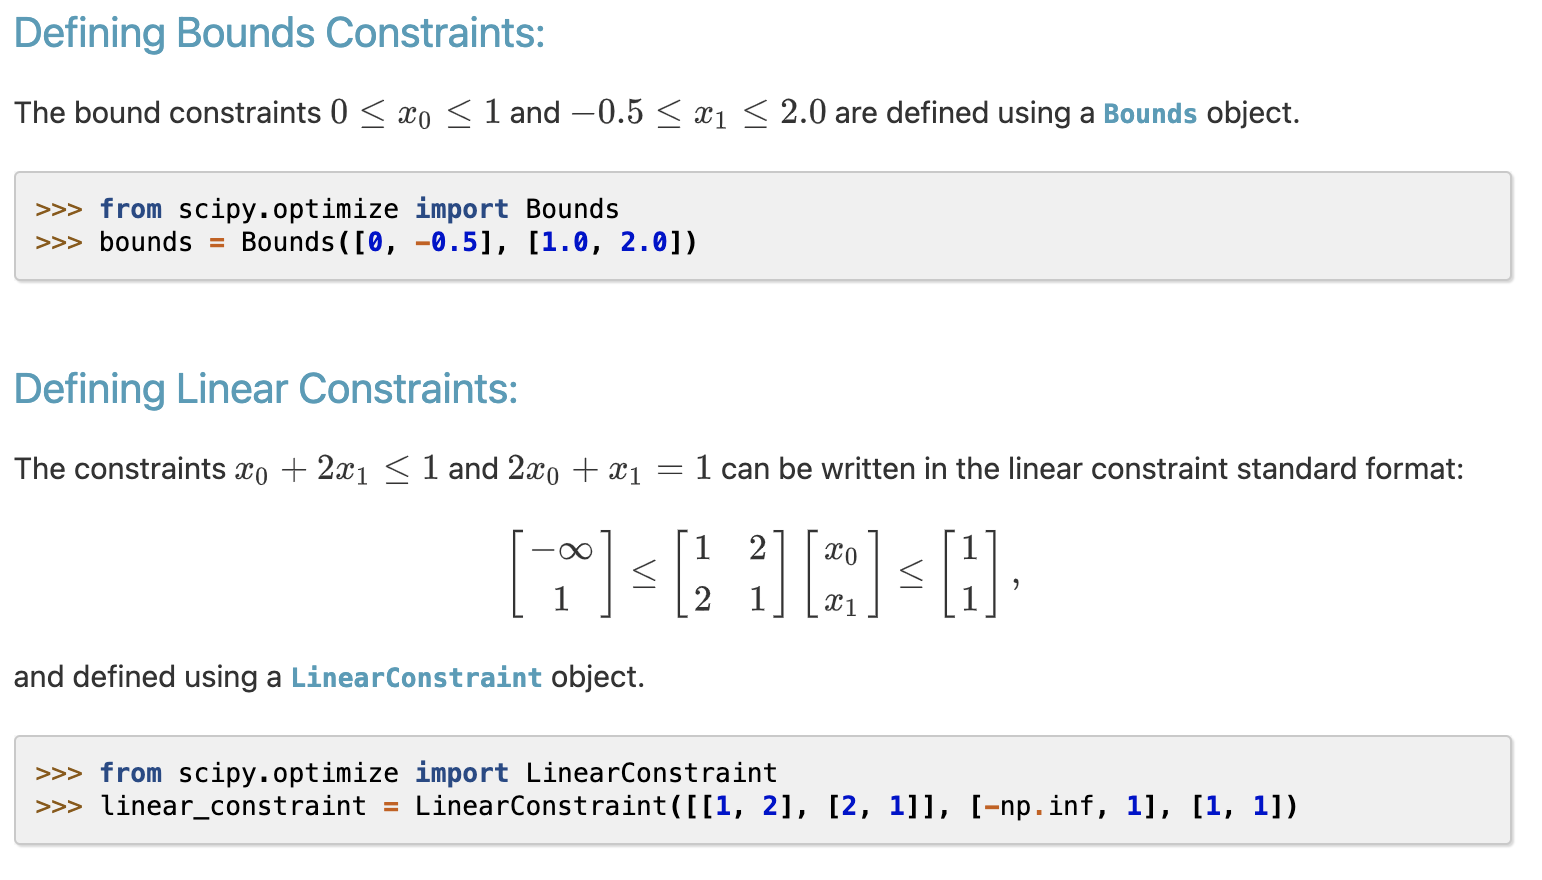
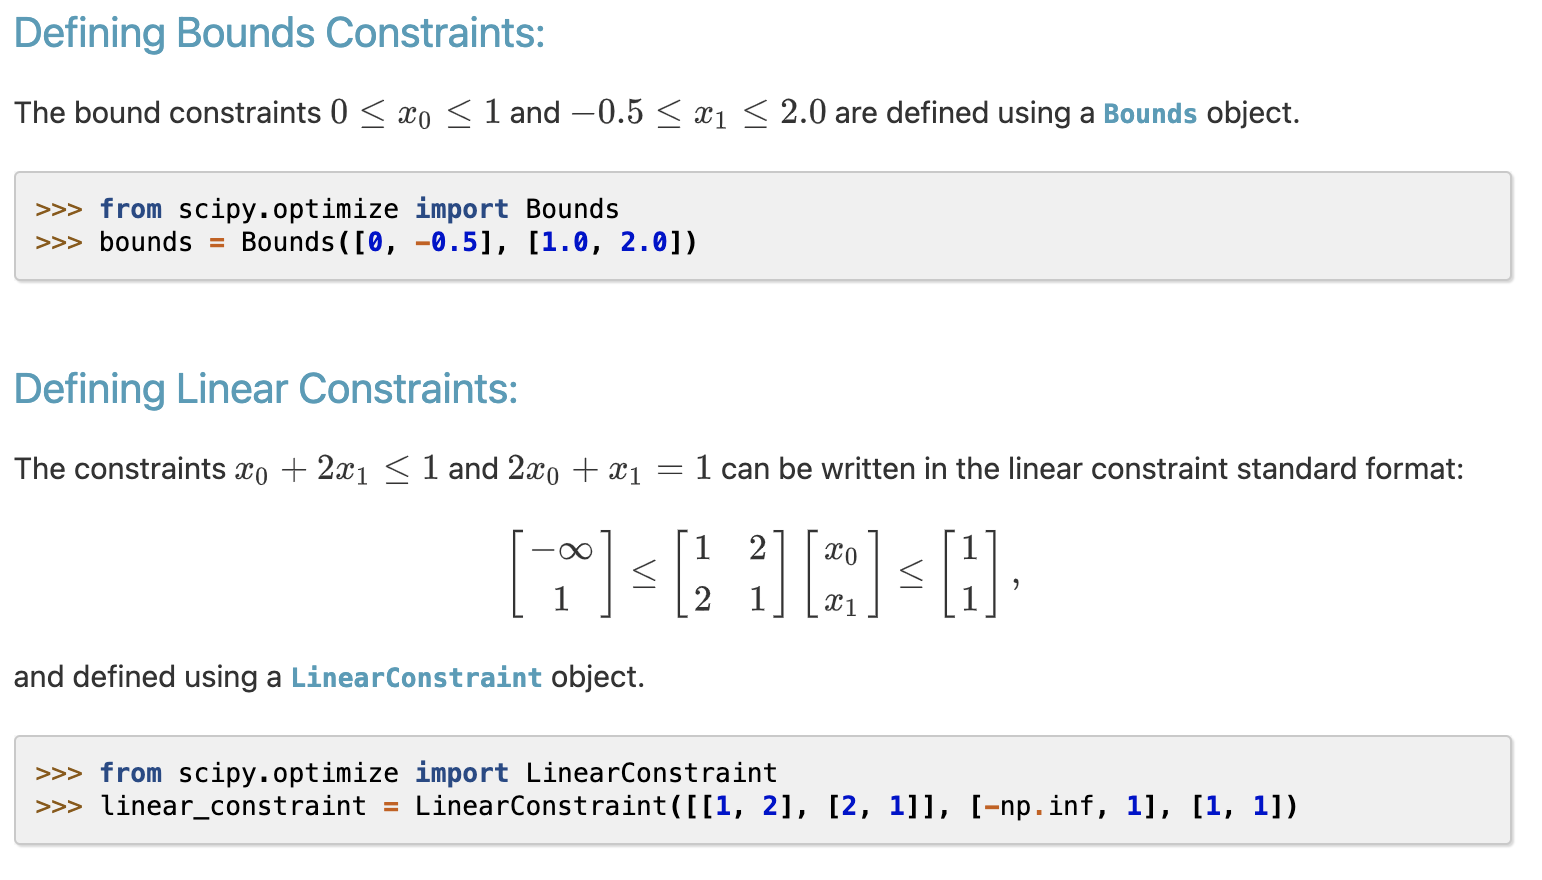
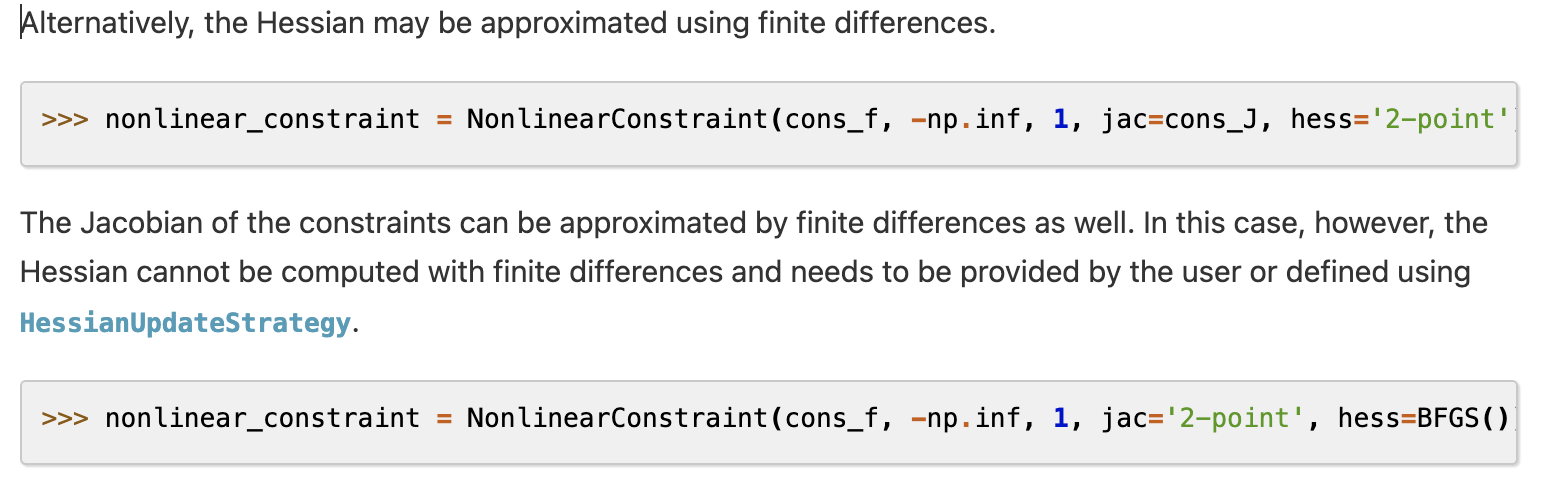
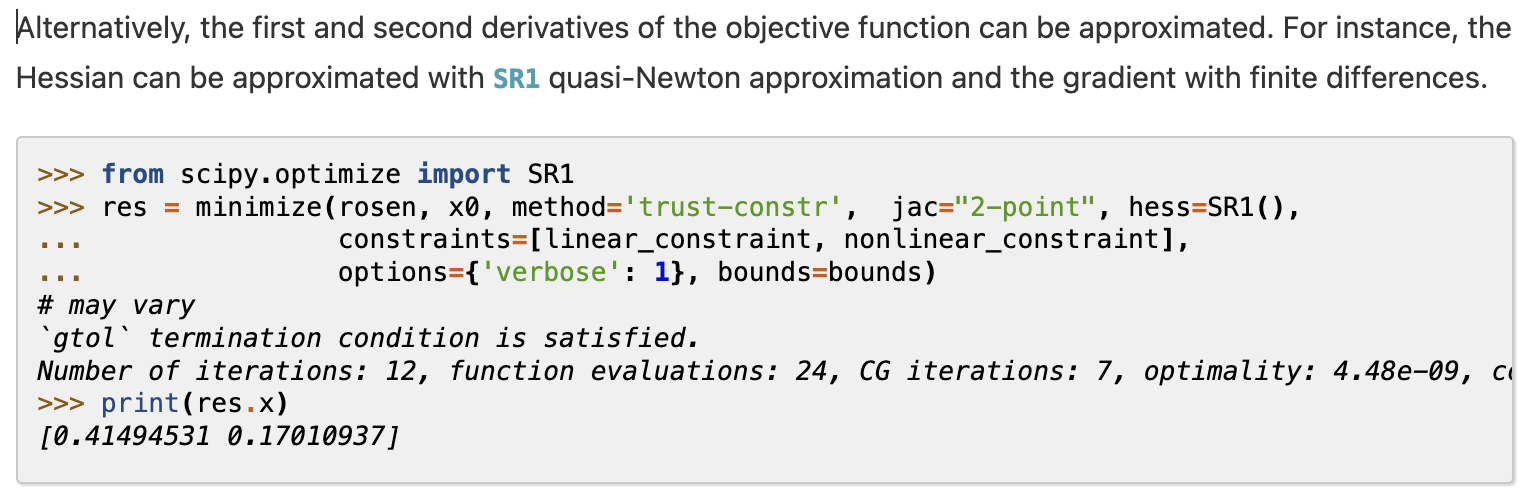

In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
from scipy.optimize import SR1

# Define the Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return 100.0*(x[1]-x[0]**2)**2 + (1-x[0])**2

# Boundaries
bounds = Bounds([0, -0.5], [1.0, 2.0])

# Linear Constraints
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

# Nonlinear Constraints
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess=BFGS())

# Initial guess
x0 = np.array([1.3, 0.7])

# Apply the minimize method
res = minimize(rosen, x0, method='trust-constr', jac='2-point', hess=SR1(),
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

print(res.x)
print(res.fun)

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, CG iterations: 8, optimality: 4.44e-09, constraint violation: 0.00e+00, execution time: 0.93 s.
[0.41494531 0.17010937]
0.34271757564429556


# Genetic Algorithm Methods
The package was developed by Ryan Solgi:
https://pypi.org/project/geneticalgorithm/



In [5]:
#!pip install geneticalgorithm

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga


### Optimized function with constraints

Now consider that we want to minimize $f(X)=x_1+x_2+x_3$ where $\bf{X}$ is a set of real variables in [0,10]. Also we have an extra constraint so that sum of $x_1$ and $x_2$ is equal or greater than $2$. The minimum of $f(X)$ is $2$. In such a case, a trick is to define penalty function.

 The best solution found:                                                                           
 [1.06537925 0.93513297 0.00180138]

 Objective function:
 2.002313600256778


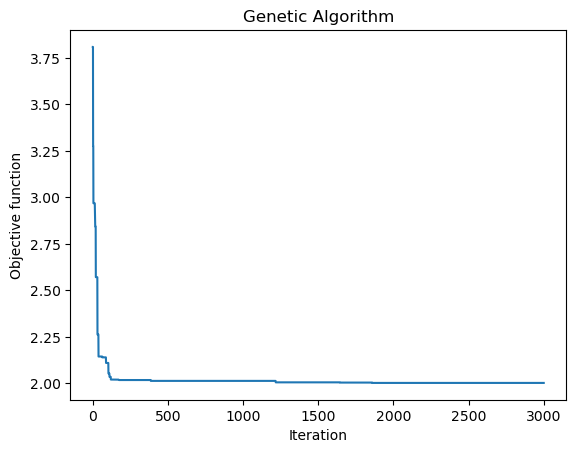

In [7]:

# Optimized function with constraints

def OF(X):
    x1,x2,x3=X
    pen=0
    if x1+x2<2:
        pen=30+1000*(2-x1-x2)
    return np.sum(X)+pen

varbound = np.array([[0, 10]] * 3)

algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, \
           dimension=3, \
           variable_type='real', \
           variable_boundaries=varbound, \
           algorithm_parameters=algorithm_param)

model.run()

### Weistrass function
http://infinity77.net/global_optimization/test_functions_nd_W.html

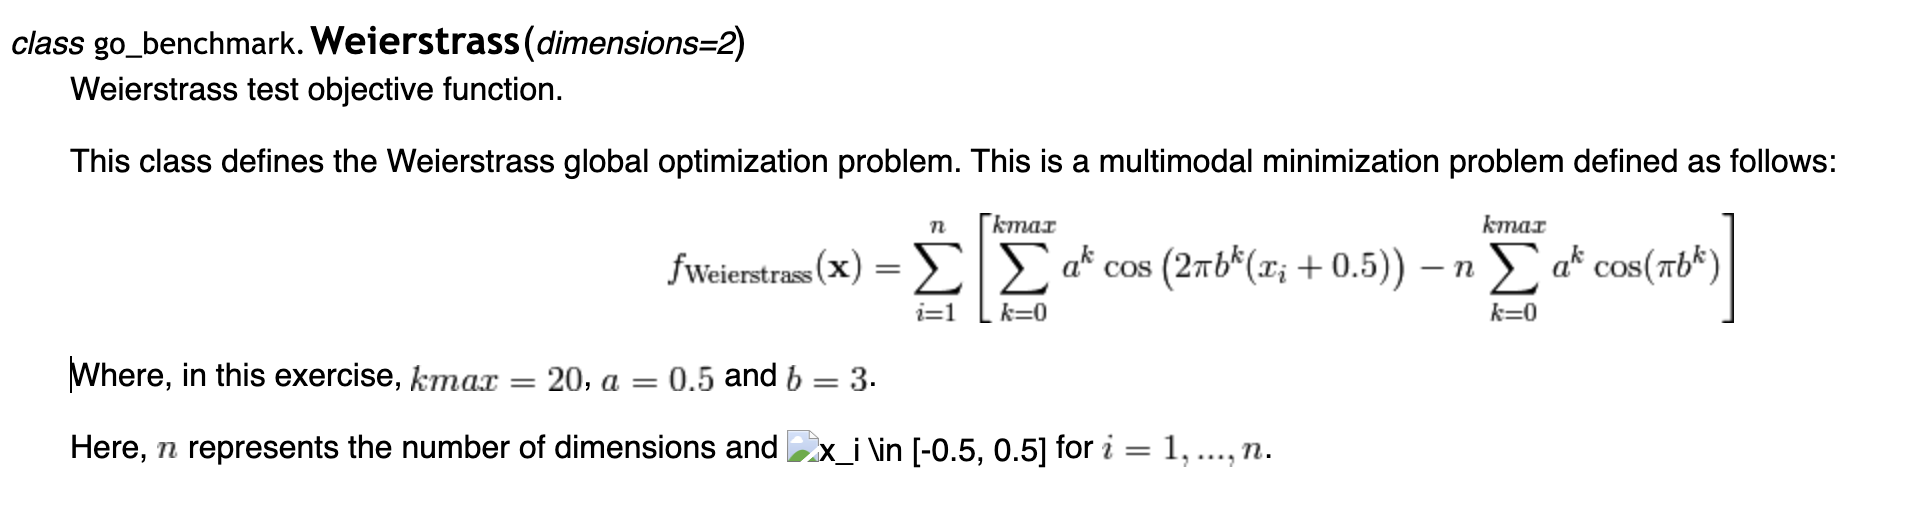

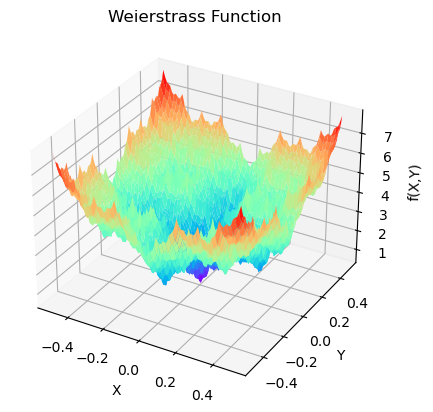

In [8]:

#Weierstrass Function_______________________________________

def f(X):
    dim = len(X)

    a = 0.5
    b = 3
    kmax=20
    OF = 0
    for i in range(0, dim):
        t1 = 0
        for k in range(0, kmax+1):
            t1 += (a ** k) * math.cos((2 * math.pi * (b ** k)) * (X[i] + 0.5))
        OF += t1
    t2 = 0
    for k in range(0, kmax+1):
        t2 += (a ** k) * math.cos(math.pi * (b ** k))
    OF -= dim * t2

    return OF


varbound = np.array([[-0.5, 0.5]] * 2)

algorithm_param = {'max_num_iteration': 2000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=f, dimension=2, \
           variable_type='real', \
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)


#Plot
# Generate data points
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = f([X[i][j], Y[i][j]])

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.set_title('Weierstrass Function')

# Show the plot
plt.show()




 The best solution found:                                                                           
 [ 4.50628149e-07 -6.71245283e-07]

 Objective function:
 0.0012719674718999485


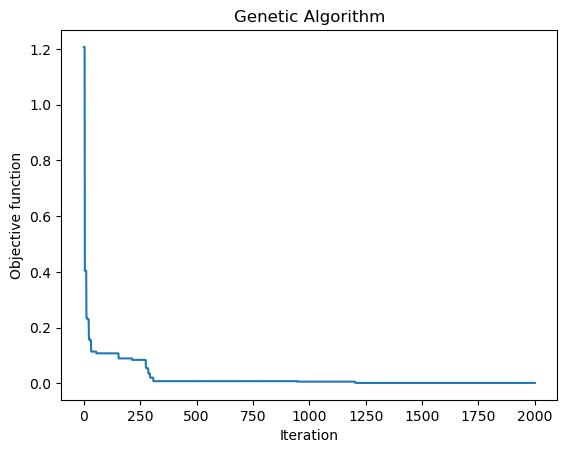

In [9]:
model.run()

### One example has written in Matlab
https://es.mathworks.com/help/gads/constrained-minimization-using-ga.html#gaconstrained-2
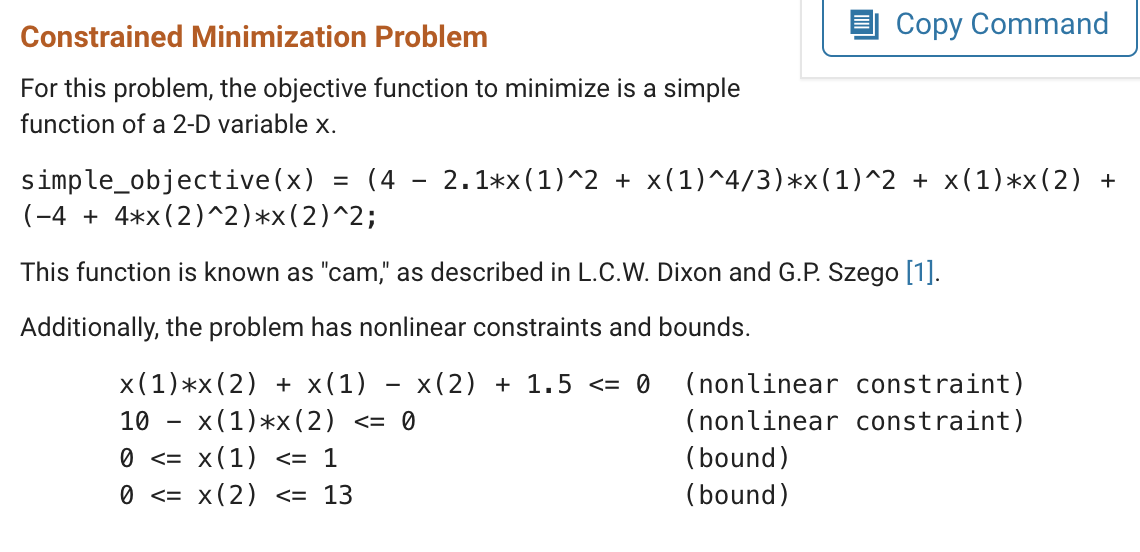

 The best solution found:                                                                           
 [ 0.81210589 12.31368042]

 Objective function:
 91367.96896890685


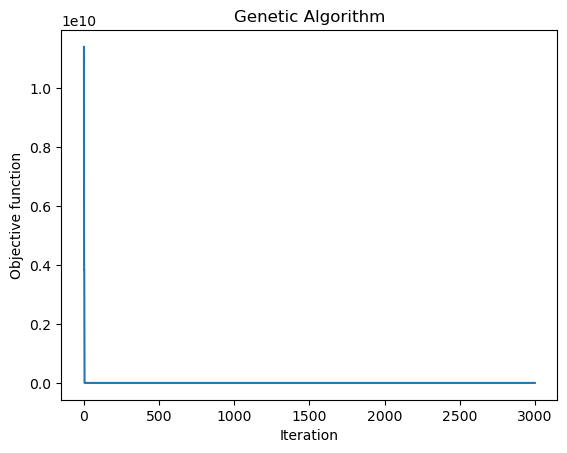

Best Solution: [ 0.81210589 12.31368042]
Best Fitness: 91367.96896890685


In [10]:
def simple_objective(x):
    x1 = x[0]
    x2 = x[1]
    y = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

    # Penalty terms for constraints
    penalty = 0.0
    c = [1.5 + x1 * x2 + x1 - x2, -x1 * x2 + 10]
    for constraint in c:
        if constraint > 0:
            penalty +=1e10*constraint

    return y + penalty

varbound = np.array([[0, 1], [0, 13]])
algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.2, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=simple_objective, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

best_solution = model.best_variable
best_fitness = model.best_function

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Mechanics problems

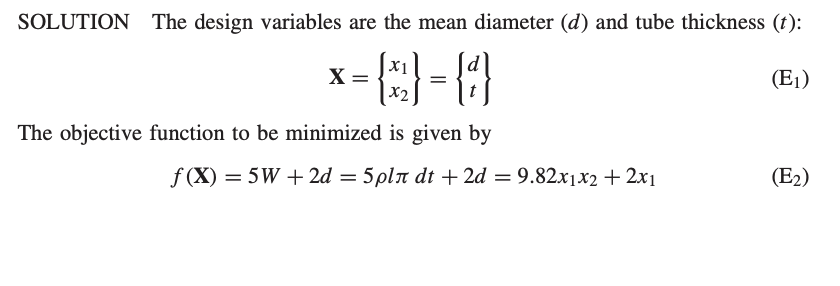
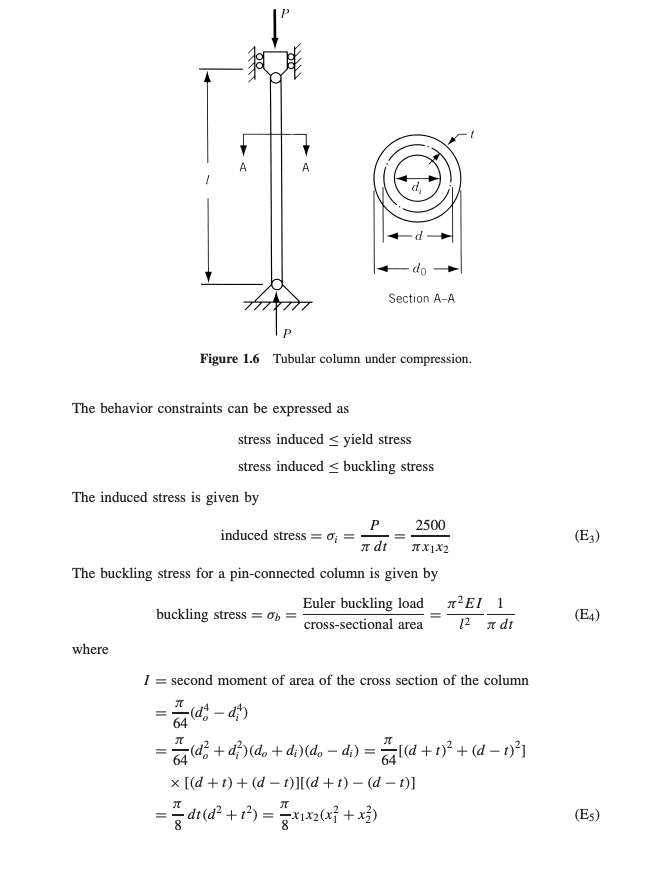
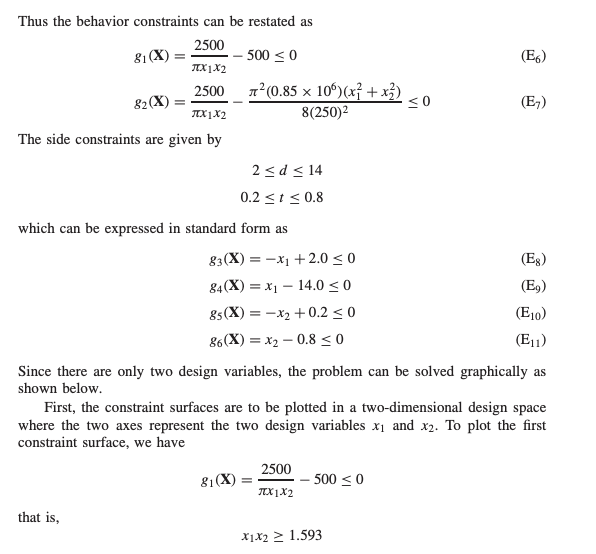
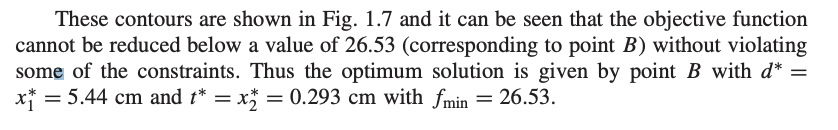

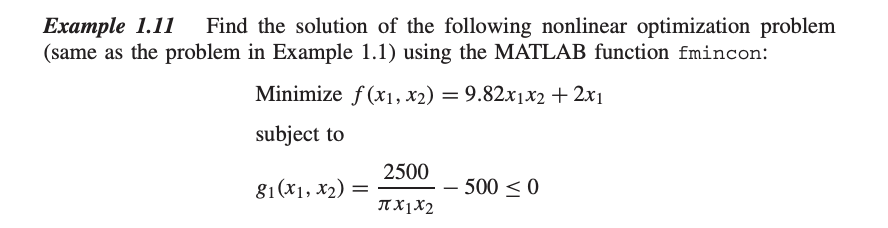

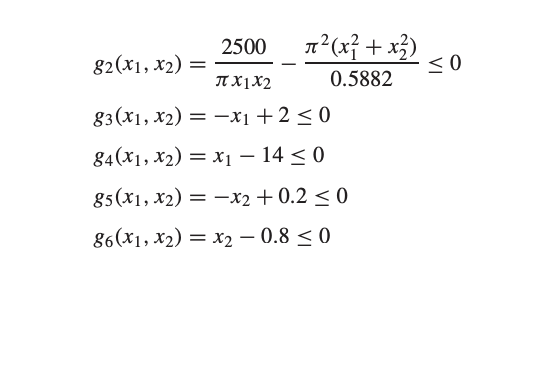

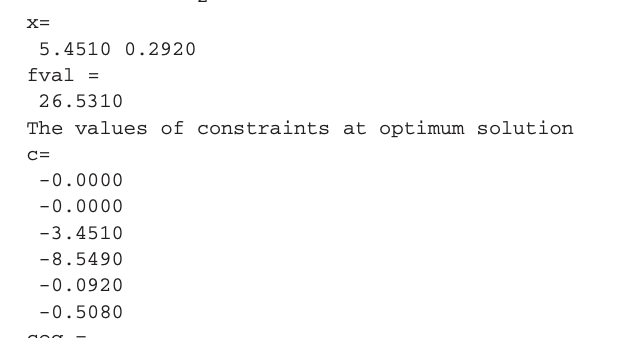

## Solved with GA

 The best solution found:                                                                           
 [5.44717107 0.29259823]

 Objective function:
 26.54577846207577


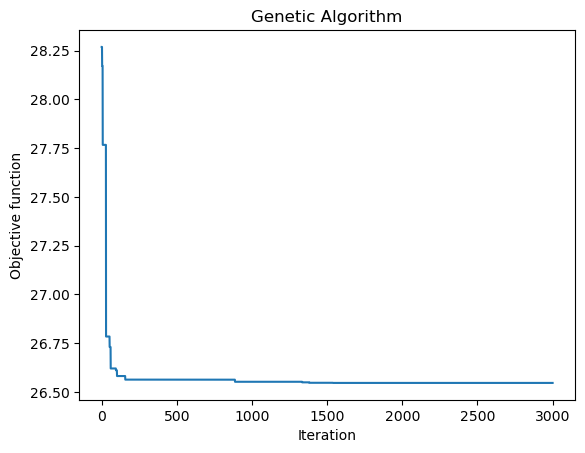

In [11]:
# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1=2500/(np.pi*x1*x2)-500
    c2=2500/(np.pi*x1*x2)-np.pi**2*(x1**2+x2**2)/0.5882
    
    return [c1,c2]
    

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y=9.82*x1*x2+2*x1
    penalty = 0.0
    
    for constraint in constraints(X):
        if constraint > 0:
            penalty +=10000+1e20*constraint

    return y + penalty

# Define the optimization problem
varbound = np.array([[2, 14],[0.2,0.8]])


algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 200, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()


## Solved with minimize

In [12]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
from scipy.optimize import Bounds
from scipy.optimize import SR1


In [13]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint, BFGS, Bounds

# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1 = 2500 / (np.pi * x1 * x2) - 500
    c2 = 2500 / (np.pi * x1 * x2) - np.pi**2 * (x1**2 + x2**2) / 0.5882
    return [c1, c2]

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y = 9.82 * x1 * x2 + 2 * x1
    penalty = 0.0
    for constraint in constraints(X):
        if constraint > 0:
            penalty += 10000 + 1e10 * constraint
    return y + penalty

# Define the optimization problem
bounds = Bounds([2, 0.2], [14, 0.8])
nonlinear_constraint = NonlinearConstraint(constraints, -np.inf, 0)
x_guess = [5.2, 0.25]

result = minimize(OF, x_guess, method='trust-constr', jac='2-point', hess=BFGS(),
                  constraints=nonlinear_constraint, bounds=bounds)

# Access the optimized solution
optimized_solution = result.x

print("Optimized Solution:", optimized_solution)
print("Optimization Result:",result.fun)




Optimized Solution: [5.45101774 0.29197366]
Optimization Result: 26.531091630318258


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


## Another sample: cros-section design
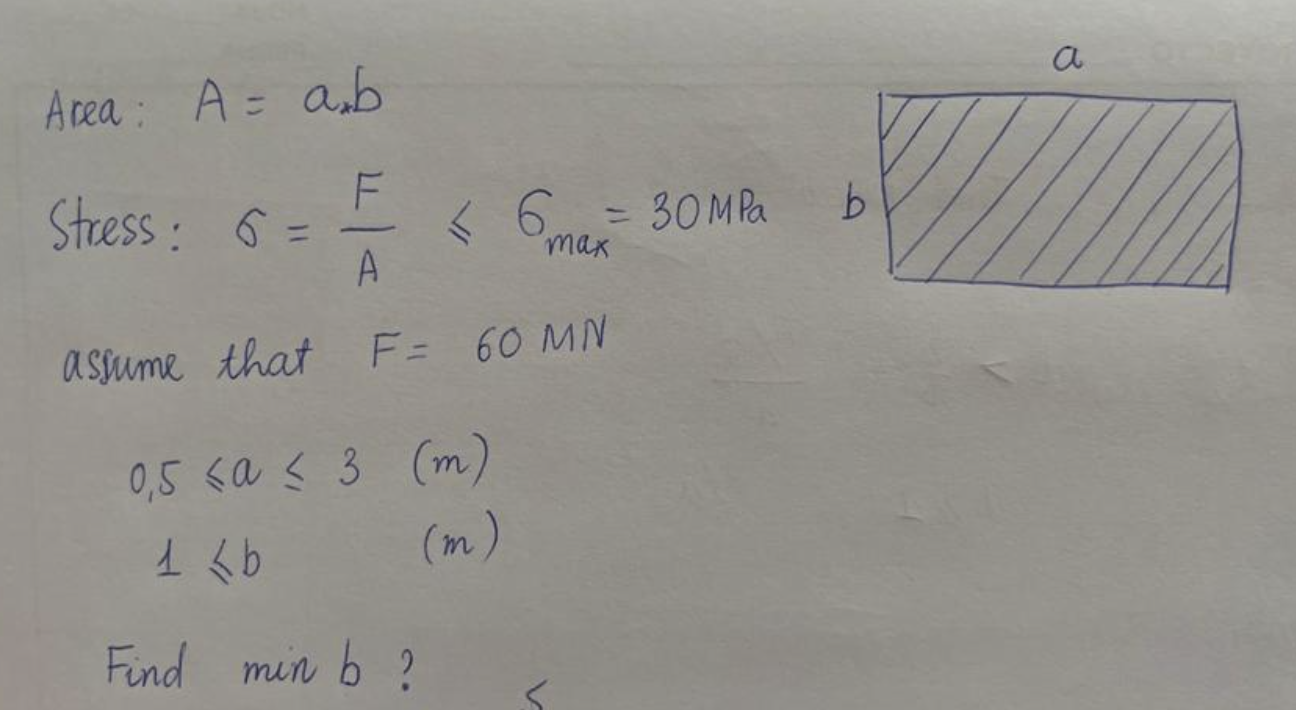


Assume we have a rectangular pile with cross-section dimensions of $a \times b$. The pile is subjected to a force $F=60MN$ in order to ensure that the stress does not exceed the maximum value of $\sigma_{max}=30MPa$. The design of the cross-section must satisfy the following boundary conditions: $0.5 \leq a\leq 3.0$ and $b\geq 1$. In this scenario, we need to determine the **minimum** value of $\bf{b}$ that satisfies these conditions.

### Solved with traditional method

In [1]:
def find_minimum_b():
    a = 0.5  # Start with the minimum value of a
    step = 0.01  # Set the step size for increasing a
    min_b = float('inf')  # Initialize min_b with infinity
    
    while a <= 4:
        b = 2 / a  # Calculate b based on a
        
        if b >= 1 and b < min_b:
            min_b = b
        
        a += step
    
    return min_b


minimum_b = find_minimum_b()
print(f"The minimum value of b is: {minimum_b}")
print(f"value of a is {2/minimum_b}")



The minimum value of b is: 1.00502512562814
value of a is 1.9900000000000015


### Solved with GA

In [2]:
import random

# Objective function: Calculate the fitness based on the equation a * b = 2
def objective_function(a, b):
    return abs(a * b - 2)

# Generate an initial population of solutions
def generate_initial_population(population_size):
    population = []
    for _ in range(population_size):
        a = random.uniform(0.5, 3)
        b = random.uniform(1, 2 / a)
        population.append((a, b))
    return population

# Select parents for crossover based on fitness (lower fitness is better)
def select_parents(population, num_parents):
    parents = []
    population.sort(key=lambda x: objective_function(x[0], x[1]))
    parents = population[:num_parents]
    return parents

# Perform crossover between parents to create new offspring
def crossover(parents, population_size):
    offspring = []
    for _ in range(population_size):
        parent1, parent2 = random.sample(parents, 2)
        a = (parent1[0] + parent2[0]) / 2
        b = (parent1[1] + parent2[1]) / 2
        offspring.append((a, b))
    return offspring

# Perform mutation on the offspring to introduce variations
def mutate(offspring, mutation_rate):
    mutated_offspring = []
    for solution in offspring:
        a = solution[0]
        b = solution[1]
        if random.random() < mutation_rate:
            # Mutate a
            a += random.uniform(-0.1, 0.1)
            a = max(0.5, min(a, 3))
            # Mutate b
            b += random.uniform(-0.1, 0.1)
            b = max(1, min(b, 2 / a))
        mutated_offspring.append((a, b))
    return mutated_offspring

# Genetic Algorithm
def genetic_algorithm(population_size, num_parents, num_generations, mutation_rate):
    population = generate_initial_population(population_size)
    for generation in range(num_generations):
        parents = select_parents(population, num_parents)
        offspring = crossover(parents, population_size)
        mutated_offspring = mutate(offspring, mutation_rate)
        population = mutated_offspring
    
    best_solution = min(population, key=lambda x: objective_function(x[0], x[1]))
    return best_solution

# Run the genetic algorithm
population_size = 100
num_parents = 10
num_generations = 100
mutation_rate = 0.1

best_solution = genetic_algorithm(population_size, num_parents, num_generations, mutation_rate)

# Print the best solution found
a = best_solution[0]
b = best_solution[1]
print(f"The minimum value of b is: {b} for a = {a}")

The minimum value of b is: 1.0656875194554445 for a = 1.8767227385960004


### soled with GA package


 The best solution found:                                                                           
 [1.00165077]

 Objective function:
 1.0016507681773819


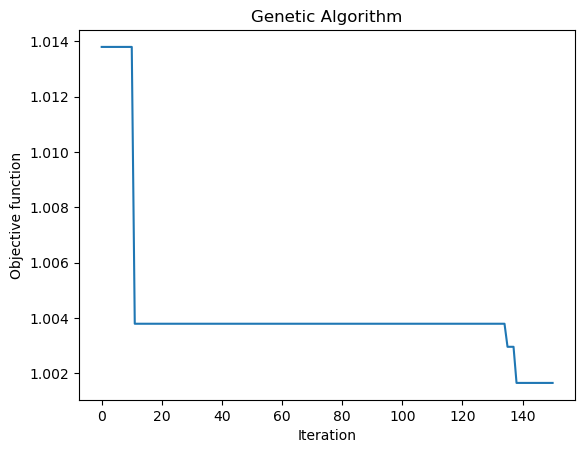

The minimum value of b that satisfies the conditions is: 1.0016507681773819


In [3]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

# Objective function: Calculate the fitness based on the value of b
def objective_function(dimensions):
    b = dimensions[0]
    return b

# Define the bounds for b
varbound = np.array([[1, 4]])

# Create an instance of the genetic algorithm solver
solver = ga(function=objective_function, dimension=1, variable_type='real', variable_boundaries=varbound)

# Define the constraint function to ensure stress does not exceed the maximum value
def constraint_function(dimensions):
    a = dimensions[0]
    b = dimensions[1]
    F = 60e6  # Applied force in Newtons
    sigma_max = 30e6  # Maximum stress in Pascals
    sigma = F / (a * b)  # Calculated stress
    return sigma - sigma_max

# Set the constraint for the genetic algorithm solver
solver.constraints = [constraint_function]

# Run the genetic algorithm optimization
solver.run()

# Retrieve the best solution found
best_solution = solver.best_variable

# Print the best solution found
b = best_solution[0]
print(f"The minimum value of b that satisfies the conditions is: {b}")

### solved with minimize

In [4]:
from scipy.optimize import minimize

# Objective function: Calculate the stress given the dimensions a and b
def objective_function(dimensions):
    a, b = dimensions
    force = 60  # MN
    stress_max = 30  # MPa
    stress = force / (a * b)
    return -stress  # Minimize the negative stress

# Constraint: Define the bounds for a and b
def constraint(dimensions):
    a, b = dimensions
    return [a - 0.5, b - 1]  # Constraint: a >= 0.5, b >= 1

# Initial guess for dimensions (a, b)
x0 = [2, 2]  # Starting point for optimization

# Optimization
result = minimize(objective_function, x0, method='SLSQP', bounds=[(0.5, 3), (1, None)], constraints={'type': 'ineq', 'fun': constraint})

# Print the minimum value of b found
b_min = result.x[1]
print(f"The minimum value of b is: {b_min}")

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The minimum value of b is: 1.0000000000001572
